In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np 
import cv2
from skimage import img_as_float

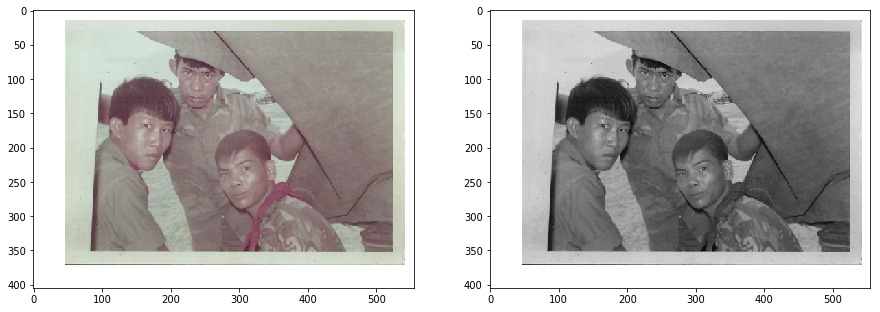

Imin:  47 Imax:  255


<Figure size 1080x432 with 0 Axes>

In [2]:
M = cv2.cvtColor(cv2.imread('viet_white.png'), cv2.COLOR_BGR2RGB)
M_gray = cv2.cvtColor(M, cv2.COLOR_RGB2GRAY)



plt.figure(figsize=[15,6])
plt.subplot(121)
plt.imshow(M)
plt.subplot(122)
plt.imshow(M_gray,'gray')
plt.show()
plt.figure(figsize=[15,6])
#plt.imshow(M_gray, cmap = 'gray')  
#plt.show()

Imin = np.amin(M_gray)
Imax = np.amax(M_gray)
print('Imin: ',Imin,'Imax: ',Imax)

# 1. Contrast Stretching

Imin:  47 Imax:  255
Iminf:  0.1843137254901961 Imaxf:  1.0


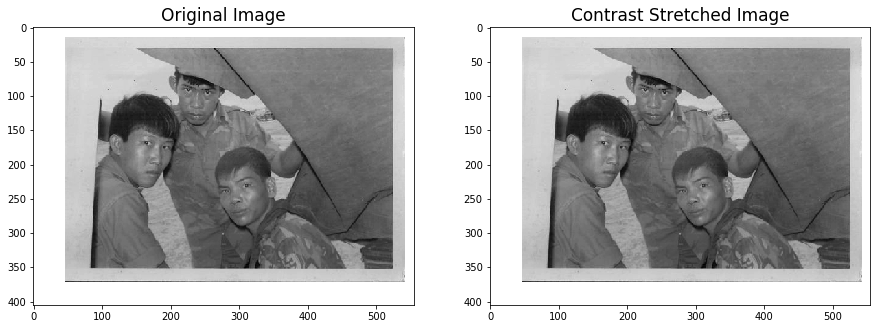

In [3]:
M_grayf = img_as_float(M_gray) #Normalizing float point
M_contra = M_grayf*255

Imin = np.amin(M_gray)
Imax = np.amax(M_gray)
Iminf = np.amin(M_grayf)
Imaxf = np.amax(M_grayf)

print('Imin: ',Imin,'Imax: ',Imax)
print('Iminf: ',Iminf,'Imaxf: ',Imaxf)

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(M_gray,'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(M_contra,'gray')
plt.title('Contrast Stretched Image')
plt.show()

# 2. Histogram Manipulation

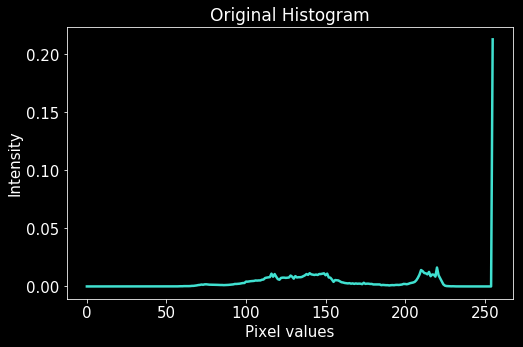

In [4]:
hist, bin_edges = np.histogram(M_gray, bins = np.linspace(0,255,257), density = "True")
#norm_hist = (hist-min(hist))/(max(hist)-min(hist))

plt.style.use('dark_background')

plt.figure(figsize=[8,5])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.plot(hist,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('Original Histogram')
plt.show()

#plt.figure(figsize=[8,5])
#plt.rcParams['axes.titlesize'] = 17
#plt.rcParams.update({'font.size': 15})
#plt.plot(norm_hist,'turquoise',linewidth=2.5)
#plt.xlabel('Pixel values')
#plt.ylabel('Intensity')
#plt.title('Normalized Histogram')
#plt.show()

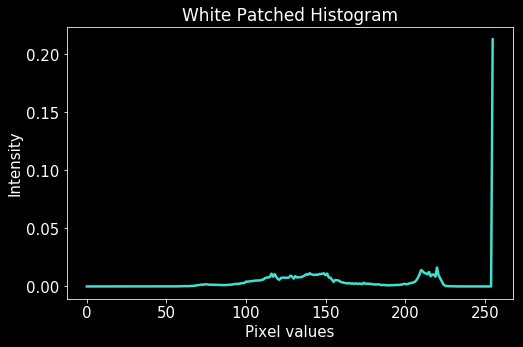

In [11]:
plt.figure(figsize=[8,5])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.plot(hist,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('White Patched Histogram')
plt.show()

# 3. CDF

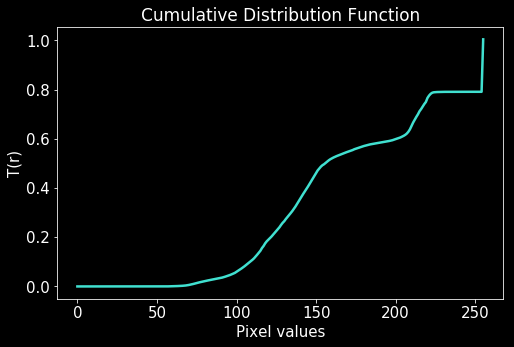

In [6]:
cdf = np.cumsum(hist)
#norm_cdf = (cdf-min(cdf))/(max(cdf)-min(cdf))

plt.figure(figsize=[8,5])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.plot(cdf,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('T(r)')
plt.title('Cumulative Distribution Function')
plt.show()


# Desired CDFs

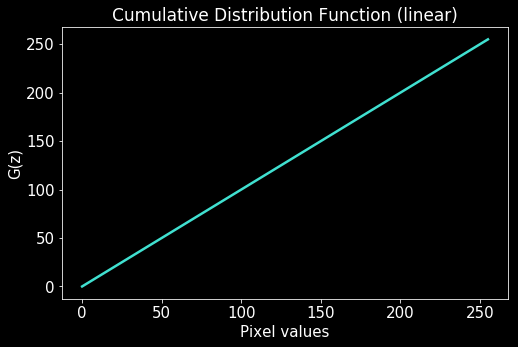

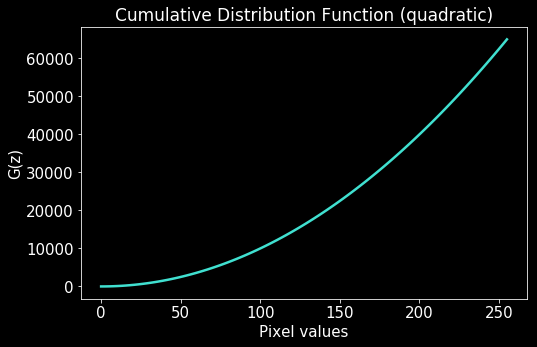

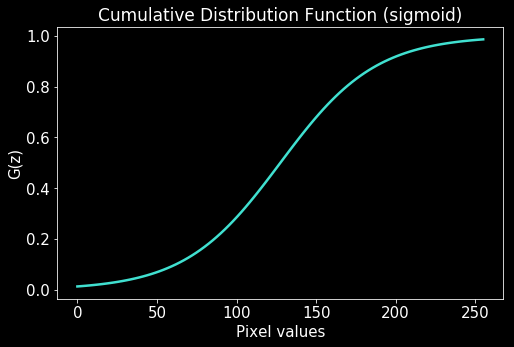

In [7]:
des_x = np.linspace(0,Imax,100)

#Quadratic 
def quad(x):
    return x**2

# Sigmoid
def sig_fxn(x):
    a = np.median(x)
    m = 30
    return (1)/(1 + np.exp((-x+a)/m))

a = np.median(des_x)
m = 30

def inv_sig(y):
    return (-((np.log((1/y)-1))*m - a))


plt.figure(figsize=[8,5])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.plot(des_x,des_x,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('G(z)')
plt.title('Cumulative Distribution Function (linear)')
plt.show()

plt.figure(figsize=[8,5])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.plot(des_x,des_x**2,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('G(z)')
plt.title('Cumulative Distribution Function (quadratic)')
plt.show()

plt.figure(figsize=[8,5])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
plt.plot(des_x,sig_fxn(des_x),'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('G(z)')
plt.title('Cumulative Distribution Function (sigmoid)')
plt.show()



# Sigmoid CDF

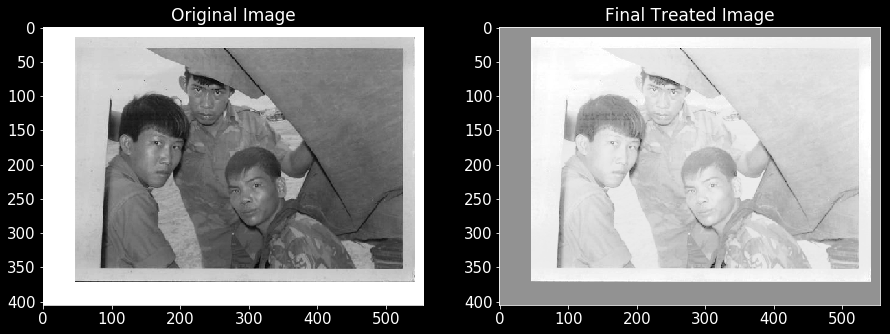

In [8]:
image_sig = np.floor(np.copy(M_gray))

for i in range(len(M_gray)):
    for j in range(len(M_gray[i])):
        before = int(M_gray[i][j])
        if before >= 250:
            continue
        percentile = cdf[before]
        desire = inv_sig(percentile)*255
        image_sig[i][j] = desire
        
final = image_sig.astype(float)
norm_final =  (final-np.min(final))/(np.max(final)-np.min(final))*255

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(M_gray,'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(norm_final,'gray')
plt.title('Final Treated Image')
plt.show()

# Linear CDF

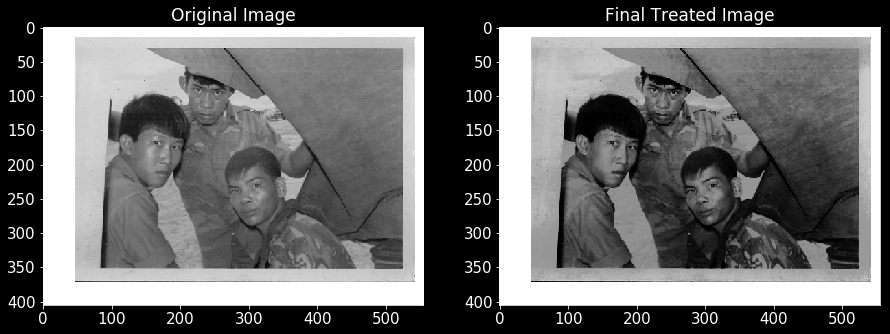

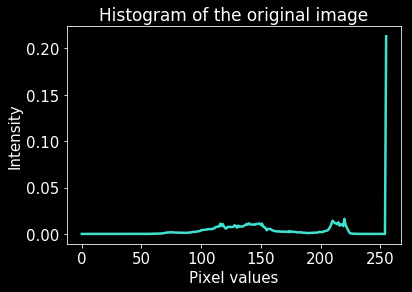

In [9]:
image_sig = np.floor(np.copy(M_gray))

for i in range(len(M_gray)):
    for j in range(len(M_gray[i])):
        before = int(M_gray[i][j])
        if before >= 250:
            continue
        percentile = cdf[before]
        desire = percentile*255
        image_sig[i][j] = desire
        
final = image_sig.astype(float)
norm_final =  (final-np.min(final))/(np.max(final)-np.min(final))

hist1, bin_edges1 = np.histogram(norm_final, bins = np.linspace(0,255,256), density = "True")

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(M_gray,'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(norm_final,'gray')
plt.title('Final Treated Image')
plt.show()

#plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.rcParams.update({'font.size': 15})
#plt.subplot(121)
plt.plot(hist,'turquoise',linewidth=2.5)
plt.xlabel('Pixel values')
plt.ylabel('Intensity')
plt.title('Histogram of the original image')
#plt.subplot(122)
#plt.plot(hist2,'turquoise',linewidth=2.5)
#plt.xlabel('Pixel values')
#plt.ylabel('Intensity')
#plt.title('Histogram of the final treated image')
plt.show()


# Quadratic CDF

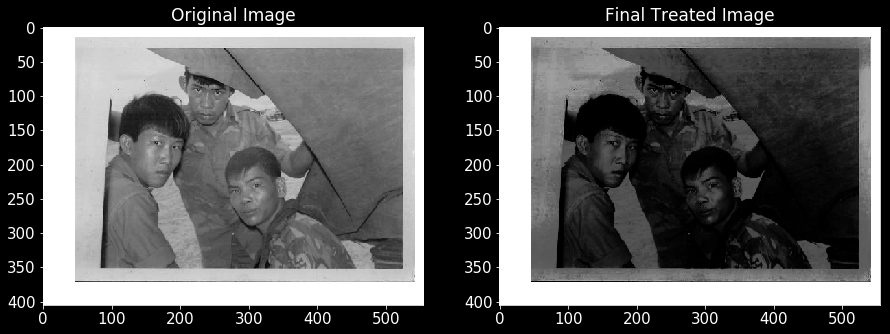

In [10]:
image_sig = np.floor(np.copy(M_gray))

for i in range(len(M_gray)):
    for j in range(len(M_gray[i])):
        before = int(M_gray[i][j])
        if before >= 250:
            continue
        percentile = cdf[before]
        desire = quad(percentile)*255
        image_sig[i][j] = desire
        
final = image_sig.astype(float)
norm_final =  (final-np.min(final))/(np.max(final)-np.min(final))


plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(M_gray,'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(norm_final,'gray')
plt.title('Final Treated Image')
plt.show()